In [2]:
# Load model
from tensorflow.keras.models import load_model
import numpy as np

model_path = "../models/EfficientNetv2.h5"
model = load_model(model_path)

In [119]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# # Load a sample image (or multiple ones)
IMAGE_PATH = '/Users/victorvoneisenhart-rothe/code/Victorvone/braintumorclassification/braintumorclassification/raw_data/Testing/pituitary/Te-pi_0015.jpg'
img = load_img(IMAGE_PATH, target_size=(255, 255))
img = img_to_array(img)
img = np.expand_dims(img, axis=0)

In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b3 (Function  (None, 8, 8, 1536)       12930622  
 al)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          221200    
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 64)                65600     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                      

In [95]:
res = model.predict(img)

1/1 [==============================] - 0s 136ms/step


In [96]:
print(res)

[[2.2490060e-05 1.8170294e-03 9.6472696e-08 9.9816042e-01]]


In [97]:
np.argmax(res)

3

In [71]:
def format_for_expl(img, classification):
    X = img
    y = np.expand_dims(np.array([classification]), axis=0)
    return (X,y)
    

In [127]:
sample = format_for_expl(img, 3)

### Activation visualization

In [73]:
from tf_explain.core.activations import ExtractActivations

ActViz = ExtractActivations()
grid = ActViz.explain(sample, model, layers_name='conv2d_2')
ActViz.save(grid, "../Visualizations/", "ActViz.png")

1/1 [==============================] - 1s 1s/step


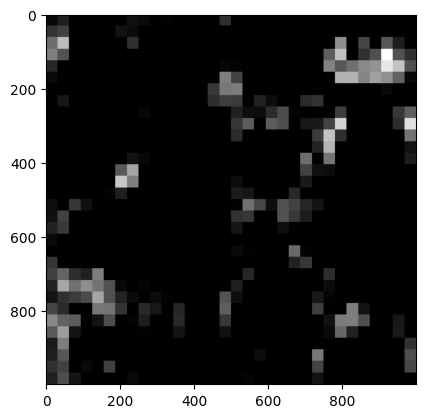

In [82]:
import matplotlib.pyplot as plt

actvizimage = load_img('../Visualizations/ActViz.png', target_size=(1000, 1000))

plt.imshow(actvizimage)

### GradCam

In [74]:
from tf_explain.core.grad_cam import GradCAM

#Start explainer
gradcam = GradCAM()
grid = gradcam.explain(sample, model, class_index=1, layer_name='conv2d_2') 

gradcam.save(grid, "../Visualizations/", "GradCam.png")

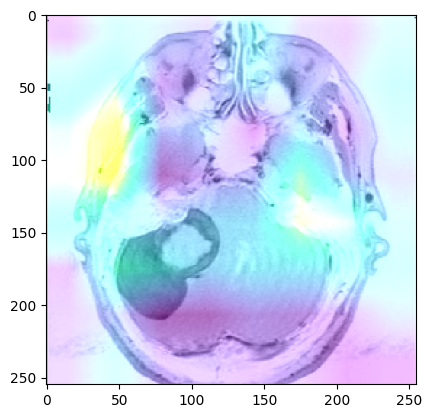

In [75]:
gradcamimage = load_img('../Visualizations/grad_cam.png', target_size=(255, 255))

plt.imshow(gradcamimage)

### VanillaGradients

In [76]:
from tf_explain.core.vanilla_gradients import VanillaGradients

Vanillagrad = VanillaGradients()
grid = Vanillagrad.explain(sample, model, class_index=1) 

Vanillagrad.save(grid, "../Visualizations/", "VanillaGradient.png")

/var/folders/yg/kt4pdk955453dzxyb3ppm5200000gn/T/ipykernel_36597/3976791739.py:4: UserWarning: Unsupported model architecture for VanillaGradients. The last two layers of the model should be: a layer which computes class scores with no activation, followed by an activation layer.
  grid = Vanillagrad.explain(sample, model, class_index=1)


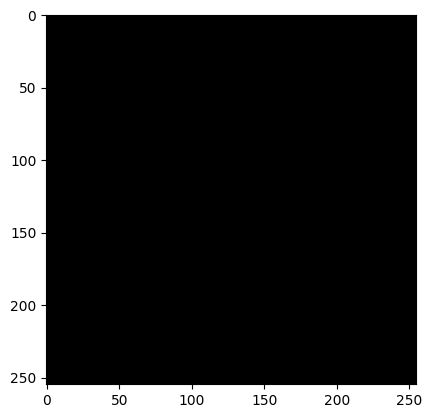

In [80]:
vanillagradimage = load_img('../Visualizations/VanillaGradient.png', target_size=(255, 255))

plt.imshow(vanillagradimage)

### Occlusion sensitivity map

In [77]:
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity

#Start explainer
occsens = OcclusionSensitivity()
grid = occsens.explain(sample, model, class_index=1, patch_size=8) 

occsens.save(grid, "../Visualizations/", "OcclusionSensitivity.png")

32/32 [==============================] - 81s 3s/step


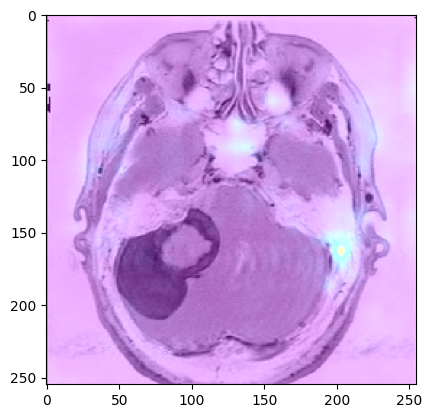

In [79]:
occsensimage = load_img('../Visualizations/OcclusionSensitivity.png', target_size=(255, 255))

plt.imshow(occsensimage)

In [124]:
def predict_and_explain(model,
                        image_tuple,
                        layers_name=None,
                        act_viz=True,
                        grad_cam=True,
                        occlusion_sensitivity=True,
                        vanilla_gradient=True):

    '''Returns prediction of tumor classification, Activation visualizations, Grad-CAM, Occlusion sensitivity
    and Vanilla gradient. It also saves pictures in ../visualizations folder. Image tuple needs
    to contain two arrays (X, y) of the following shape: none, 255, 255, 3 and none, 4'''

    # Prediction
    prediction = model.predict(image_tuple[0])
    class_index = np.argmax(prediction)

    # Activation visualizations
    if act_viz is True and layers_name is not None:
        actviz = ExtractActivations()
        grid_actviz = actviz.explain(image_tuple, model, layers_name=layers_name)
        actviz.save(grid_actviz, "../Visualizations/", "ActViz.png")
    else:
        grid_actviz = None

    # Grad-CAM
    if grad_cam is True:
        gradcam = GradCAM()
        grid_gradcam = gradcam.explain(image_tuple, model, class_index=class_index)
        # maybe change class_index to variable +
        gradcam.save(grid_gradcam, "../Visualizations/", "GradCam.png")
    else:
        grid_gradcam = None

    # Occlusion sensitivity
    if occlusion_sensitivity is True:
        occsens = OcclusionSensitivity()
        grid_occsens = occsens.explain(image_tuple, model, class_index=class_index, patch_size=8)
        occsens.save(grid_occsens, "../Visualizations/", "OcclusionSensitivity.png")
    else:
        grid_occsens = None

    # Vanilla gradient
    if vanilla_gradient is True:
        Vanillagrad = VanillaGradients()
        grid_vanillagrad = Vanillagrad.explain(image_tuple, model, class_index=class_index)
        Vanillagrad.save(grid_vanillagrad, "../Visualizations/", "VanillaGradient.png")
    else:
        grid_vanillagrad = None

    return prediction, grid_actviz, grid_gradcam, grid_occsens, grid_vanillagrad

In [136]:
visualizations = predict_and_explain(model, sample, layers_name='conv2d_1')

32/32 [==============================] - 44s 1s/step


/var/folders/yg/kt4pdk955453dzxyb3ppm5200000gn/T/ipykernel_36597/468257625.py:45: UserWarning: Unsupported model architecture for VanillaGradients. The last two layers of the model should be: a layer which computes class scores with no activation, followed by an activation layer.
  grid_vanillagrad = Vanillagrad.explain(image_tuple, model, class_index=class_index)


3


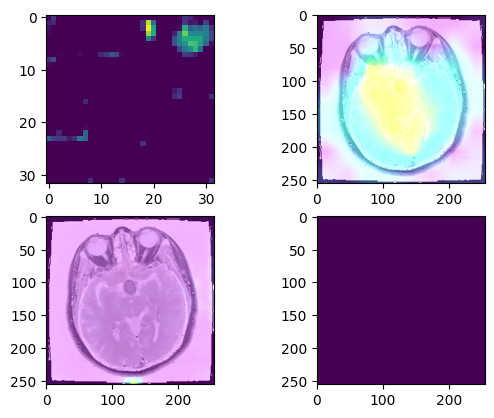

In [137]:
print(np.argmax(visualizations[0]))
fig, axs = plt.subplots(2,2)
axs[0,0].imshow(visualizations[1])
axs[0,1].imshow(visualizations[2])
axs[1,0].imshow(visualizations[3])
axs[1,1].imshow(visualizations[4])